In [1]:
#%matplotlib notebook

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import astropy as ap
#import specreduce

In [3]:
import sys
sys.path.append('/home/sydneeod/.local/bin')

### Even though you are submitting these with `git` and this file tells you to rename it, and you should be pushing to a dedicated folder with your username, please also stick your name in this file here, so there's extra redundancy. 

The point of this assignment is to:
- get comfortable with photon energy, frequency, and wavelength - calculate power and luminosity
- know now to convert magnitudes, fluxes, photon counts.
- start basic Python scripts and plotting

# Q1. Make plot of the electromagnetic spectrum using Python. (30 pts)
- Your plot should have multiple x-axes - one for wavelength (in meters), one for frequency (in Hz), one for energy (in eV)
    (hint: `gridspec` or `subplots` in general can be used to do this. See if you can find something useful here: https://matplotlib.org/stable/gallery/index) (10 pts)
- axes should be lograthmic, and each of these axes should have ticklabels that are exponential above or below (5 pts)
- the wavelength axes should also have more conventional SI units for km, mm, micron, nm, Angstrom, and picometer labelled (5 pts)
- label each region of the EM spectrum (10 pts)

 Something like this: 

<img src="https://aktinovolia.com/wp-content/uploads/aktinovolia.com-radiation-chart-electromagnetic-spectrum-rf-em-spectrum-rf-electromagnetic-3-.jpg">

or (except you should have energy too) 

<img src="https://multiphaseism.wordpress.com/wp-content/uploads/2013/05/electromagnetic_spectrum.jpg">

# Remember to save your script. Stay organized. You will be reusing code.

You are encouraged to add your own flourishes to the plot.
Joseph is empowered to give out 5 points as he sees fit for aesthetics. 

Keep this plot handy. You should be able to intuitively convert between these values in your head. 

In [4]:
from matplotlib.ticker import FuncFormatter

## Constants
c = 299792458  # Speed of light m/s
h = 6.62607015e-34  # Planck's constant J*s
eV = 1.602176634e-19  # e- coulombs

## Wavelength - meters
wavelength_min = 1e-17 # gamma
wavelength_max = 1e4   # radio
wavelength_range = np.array([1e-17, 1e-15, 1e-12, 1e-10, 1e-9, 1e-6, 1e-3, 1e0, 1e3, 1e4], dtype=float)
wavelength_labels = ['10 zm', '1 fm', '1 pm', '1 Å', '1 nm', '1 μm', '1 mm', '1 m', '1 km', '10 km']

In [5]:
## Regions

# Radio region - 1e-1 m to 1e4 m
radio_start = max(1e-1, wavelength_min)
radio_end = min(1e4, wavelength_max)

#Microwave - 1e-3 m to 1e-1 m
microwave_start = max(1e-3, wavelength_min)
microwave_end = min(1e-1, wavelength_max)

# Infrared - 7e-7 m to 1e-3 m
infrared_start = max(7e-7, wavelength_min)
infrared_end = min(1e-3, wavelength_max)

# Visible - 4e-7 m to 7e-7 m
visible_start = max(4e-7, wavelength_min)
visible_end = min(7e-7, wavelength_max)

# Ultraviolet: 1e-8 m to 4e-7 m
ultraviolet_start = max(1e-8, wavelength_min)
ultraviolet_end = min(4e-7, wavelength_max)

# X-ray - 1e-11 m to 1e-8 m
xray_start = max(1e-11, wavelength_min)
xray_end = min(1e-8, wavelength_max)

# Gamma ray - 1e-17 m to 1e-11 m
gamma_start = max(1e-17, wavelength_min)
gamma_end = min(1e-11, wavelength_max)

In [6]:
# Exponential tick labels for wavelength axis
def wavelength_formatter(x, pos):
    exponent = np.log10(x)
    return r'$10^{{{:.0f}}}$'.format(exponent)

# Exponential tick labels for frequency axis
def frequency_formatter(x, pos):
    exponent = np.log10(x)
    return r'$10^{{{:.0f}}}$'.format(exponent)

# Exponential tick labels for energy axis
def energy_formatter(x, pos):
    exponent = np.log10(x)
    return r'$10^{{{:.0f}}}$'.format(exponent)

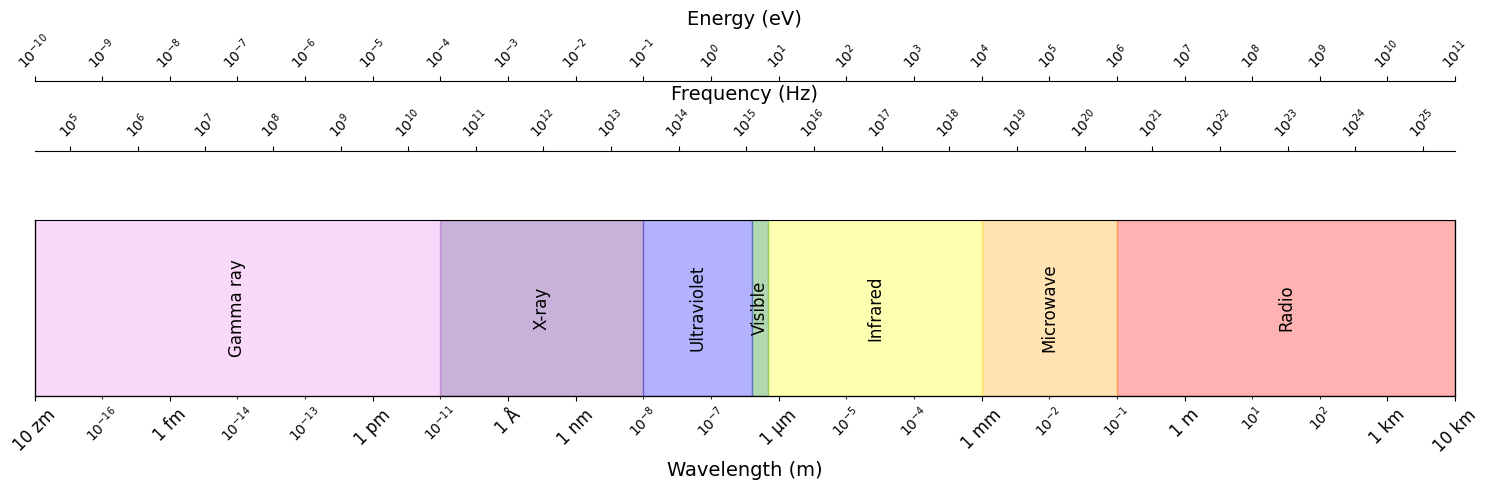

In [7]:
## wavelength
fig, ax1 = plt.subplots(figsize=(15, 5))
ax1.set_xscale('log')
ax1.set_xlim(wavelength_min, wavelength_max)
ax1.set_xlabel('Wavelength (m)', fontsize=14)
ax1.set_ylim(0, 1)
ax1.yaxis.set_visible(False)
ax1.set_xticks(wavelength_range)
ax1.set_xticklabels(wavelength_labels, fontsize=12, rotation=45)

## frequency
frequency_min = c / wavelength_max
frequency_max = c / wavelength_min
ax2 = ax1.twiny()
ax2.set_xscale('log')
ax2.set_xlim(frequency_min, frequency_max)
ax2.set_xlabel('Frequency (Hz)', fontsize=14)
ax2.spines['top'].set_position(('outward', 50))

## energy
energy_min = h * c / wavelength_max / eV
energy_max = h * c / wavelength_min / eV
ax3 = ax1.twiny()
ax3.set_xscale('log')
ax3.set_xlim(energy_min, energy_max)
ax3.set_xlabel('Energy (eV)', fontsize=14)
ax3.spines['top'].set_position(('outward', 100))


minor_exponents = np.arange(-17, 5, dtype=float)
minor_wavelength_ticks = 10.0 ** minor_exponents
ax1.set_xticks(minor_wavelength_ticks, minor=True)
ax1.xaxis.set_minor_formatter(FuncFormatter(wavelength_formatter))
ax1.tick_params(axis='x', which='minor', labelsize=10, rotation=45)

frequency_exponents = np.arange(5, 26, dtype=float)
frequency_ticks = 10.0 ** frequency_exponents
ax2.set_xticks(frequency_ticks)
ax2.xaxis.set_major_formatter(FuncFormatter(frequency_formatter))
ax2.tick_params(axis='x', labelsize=10, rotation=45)

energy_ticks = h * c / minor_wavelength_ticks / eV
ax3.set_xticks(energy_ticks)
ax3.xaxis.set_major_formatter(FuncFormatter(energy_formatter))
ax3.tick_params(axis='x', labelsize=10, rotation=45)

## Radio  
if radio_start < radio_end:
    ax1.axvspan(radio_start, radio_end, color='red', alpha=0.3)
    radio_label_position = np.sqrt(radio_start * radio_end)
    ax1.text(
        radio_label_position, 0.5, 'Radio',
        rotation=90, ha='center', va='center', fontsize=12
    )

## Microwave 
if microwave_start < microwave_end:
    ax1.axvspan(microwave_start, microwave_end, color='orange', alpha=0.3)
    microwave_label_position = np.sqrt(microwave_start * microwave_end)
    ax1.text(
        microwave_label_position, 0.5, 'Microwave',
        rotation=90, ha='center', va='center', fontsize=12
    )

## Infrared
if infrared_start < infrared_end:
    ax1.axvspan(infrared_start, infrared_end, color='yellow', alpha=0.3)
    infrared_label_position = np.sqrt(infrared_start * infrared_end)
    ax1.text(
        infrared_label_position, 0.5, 'Infrared',
        rotation=90, ha='center', va='center', fontsize=12
    )

## Visible
if visible_start < visible_end:
    ax1.axvspan(visible_start, visible_end, color='green', alpha=0.3)
    visible_label_position = np.sqrt(visible_start * visible_end)
    ax1.text(
        visible_label_position, 0.5, 'Visible',
        rotation=90, ha='center', va='center', fontsize=12
    )

## Ultraviolet
if ultraviolet_start < ultraviolet_end:
    ax1.axvspan(ultraviolet_start, ultraviolet_end, color='blue', alpha=0.3)
    ultraviolet_label_position = np.sqrt(ultraviolet_start * ultraviolet_end)
    ax1.text(
        ultraviolet_label_position, 0.5, 'Ultraviolet',
        rotation=90, ha='center', va='center', fontsize=12
    )

## X-ray
if xray_start < xray_end:
    ax1.axvspan(xray_start, xray_end, color='indigo', alpha=0.3)
    xray_label_position = np.sqrt(xray_start * xray_end)
    ax1.text(
        xray_label_position, 0.5, 'X-ray',
        rotation=90, ha='center', va='center', fontsize=12
    )

## Gamma ray
if gamma_start < gamma_end:
    ax1.axvspan(gamma_start, gamma_end, color='violet', alpha=0.3)
    gamma_label_position = np.sqrt(gamma_start * gamma_end)
    ax1.text(
        gamma_label_position, 0.5, 'Gamma ray',
        rotation=90, ha='center', va='center', fontsize=12
    )

plt.tight_layout()
plt.show()

# Q2. Dealing with Data from Multiple Sources - adding passbands and atmospheric transmission (30 pts)

### 2.1
Get the Optical Atmospheric Transmission using the `specreduce` package
    `pip install specreduce`
    https://specreduce.readthedocs.io/en/latest/extinction.html

Note that the optical transmission curves do not include the effect of molecules as the website tells you.
Follow their instructions to add 2.3mm of Preciptiable Water Vapr at an Airmass of 1.0 to the optical transmission. 

Get NIR and MIR transmission curves from here (we're not using MIR this week, but you'll use this code next HW as well)
	http://www.gemini.edu/sciops/telescopes-and-sites/observing-condition-constraints/ir-transmission-spectra
(Cerro Pachon, 2.3mm of Precipitable Water Vapor, Airmass 1.0)


In [8]:
pip install specreduce

Defaulting to user installation because normal site-packages is not writeable
  Using cached astropy-6.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.0 MB)
  Using cached numpy-2.1.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.3 MB)
  Using cached scipy-1.14.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (41.2 MB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 2.1.1 which is incompatible.
pyfftw 0.13.0 requires numpy<2.0,>=1.16, but you have numpy 2.1.1 which is incompatible.
Note: you may need to restart the kernel 

In [7]:
pip install --upgrade astropy specreduce specutils gwcs


Defaulting to user installation because normal site-packages is not writeable
  Using cached astropy-6.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.0 MB)
  Using cached numpy-2.1.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.3 MB)
  Using cached scipy-1.14.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (41.2 MB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 2.1.1 which is incompatible.
pyfftw 0.13.0 requires numpy<2.0,>=1.16, but you have numpy 2.1.1 which is incompatible.
Note: you may need to restart the kernel 

In [10]:
pip show astropy specreduce specutils gwcs

Name: astropy
Version: 5.0
Summary: Astronomy and astrophysics core library
Home-page: http://astropy.org
Author: The Astropy Developers
Author-email: astropy.team@gmail.com
License: BSD 3-Clause License
Location: /cvmfs/spt.opensciencegrid.org/py3-v4/RHEL_9_x86_64/lib/python3.10/site-packages
Requires: pyerfa, packaging, numpy, PyYAML
Required-by: pyvo, photutils, astroquery, specutils, specreduce, ndcube, gwcs, asdf-astropy, healpy
---
Name: specreduce
Version: 1.4.1
Summary: Astropy coordinated package for Spectroscopic Reductions
Home-page: 
Author: 
Author-email: Astropy Specreduce contributors <astropy-dev@googlegroups.com>
License: Copyright (c) 2017, Astropy-specreduce Developers
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without modification,
        are permitted provided that the following conditions are met:
        
        * Redistributions of source code must retain the above copyright notice, this
          l

In [8]:
from scipy.interpolate import interp1d

# Load the 2.3mm PWV transmission data
pwv_data = np.loadtxt('2.3mm_pwv_transmission.txt', delimiter=',', skiprows=1)
pwv_wavelength = pwv_data[:, 0]  # in microns
pwv_transmission = pwv_data[:, 1]

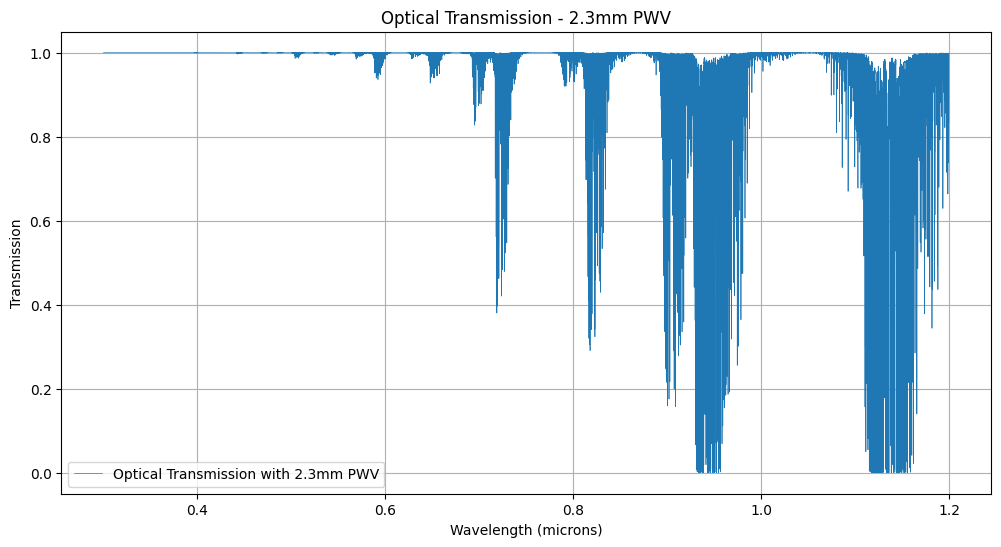

In [9]:
plt.figure(figsize=(12, 6)) 
plt.plot(pwv_wavelength, pwv_transmission, linewidth = '0.5', label='Optical Transmission with 2.3mm PWV')
plt.xlabel('Wavelength (microns)')
plt.ylabel('Transmission')
plt.title('Optical Transmission - 2.3mm PWV')
plt.legend()
plt.grid(True)
plt.show()

### NIR and MIR Transmission Curves

NIR and MIR transmission curves - http://www.gemini.edu/sciops/telescopes-and-sites/observing-condition-constraints/ir-transmission-spectra

In [10]:
nir_data = np.loadtxt('cptrans_zm_23_10.dat.txt')
nir_wavelength = nir_data[:, 0]  # microns
nir_transmission = nir_data[:, 1]

mir_data = np.loadtxt('cptrans_zm_23_10.dat.txt')
mir_wavelength = mir_data[:, 0]  # microns
mir_transmission = mir_data[:, 1]

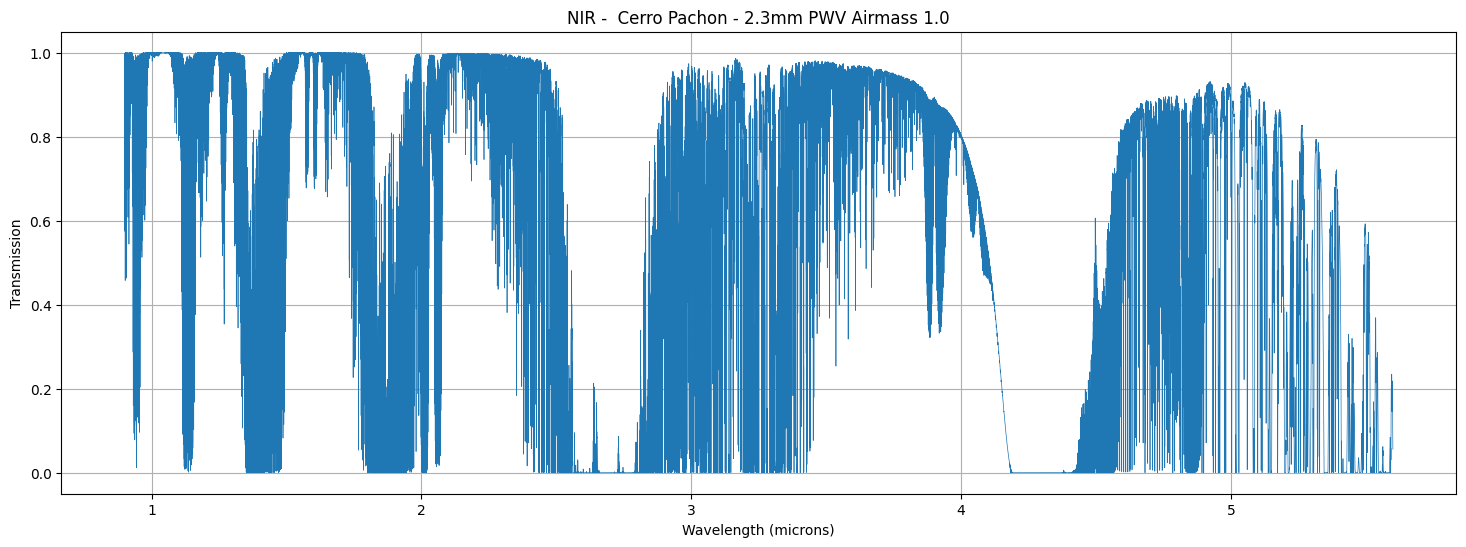

In [11]:
plt.figure(figsize=(18, 6))
plt.plot(nir_wavelength, nir_transmission,linewidth = '0.5', label='NIR')
plt.xlabel('Wavelength (microns)')
plt.ylabel('Transmission')
plt.title('NIR -  Cerro Pachon - 2.3mm PWV Airmass 1.0')
plt.grid(True)
plt.show()

In [12]:
# Combine wavelength and transmission 
combined_wavelength = np.concatenate((pwv_wavelength, nir_wavelength, mir_wavelength))
combined_transmission = np.concatenate((pwv_transmission, nir_transmission, mir_transmission))

# sort
indices = np.argsort(combined_wavelength)
combined_wavelength = combined_wavelength[indices]
combined_transmission = combined_transmission[indices]

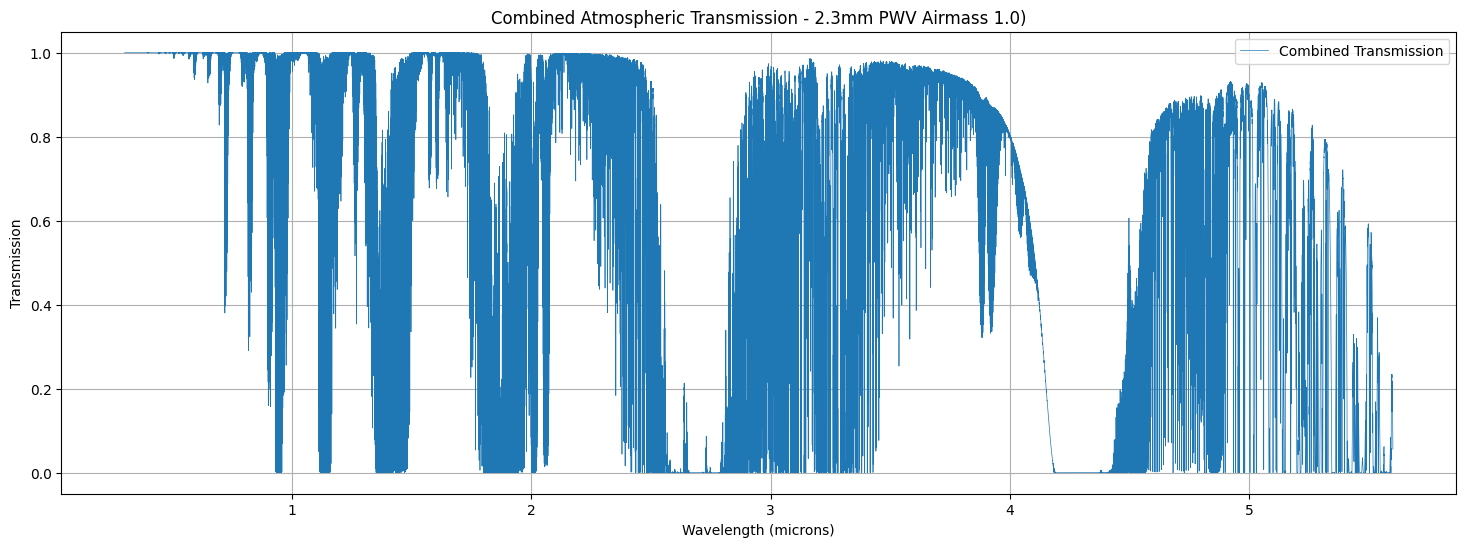

In [13]:
plt.figure(figsize=(18, 6))
plt.plot(combined_wavelength, combined_transmission,linewidth = '0.5', label='Combined Transmission')
plt.xlabel('Wavelength (microns)')
plt.ylabel('Transmission')
plt.title('Combined Atmospheric Transmission - 2.3mm PWV Airmass 1.0)')
plt.legend()
plt.grid(True)
plt.show()

### 2.2
Get the LSST Filter Transmissions (ugrizy, filter only) from here:
http://svo2.cab.inta-csic.es/theory/fps3/index.php?mode=browse

and the IRTF (\[JHK\]_MK, filter only) transmissions from here:
https://irtfweb.ifa.hawaii.edu/~nsfcam2/Filter_Profiles.html

## !Please note that the filter tranmissions are determined by counting photons, not measuing energy! 

downloaded from website - done

In [14]:
import pandas as pd

In [15]:
lsst_filter_files = {
    'u': 'LSST_LSST.u_filter.dat',
    'g': 'LSST_LSST.g_filter.dat',
    'r': 'LSST_LSST.r_filter.dat',
    'i': 'LSST_LSST.i_filter.dat',
    'z': 'LSST_LSST.z_filter.dat',
    'y': 'LSST_LSST.y_filter.dat'
}
lsst_wavelengths = {}
lsst_transmissions = {}

irtf_filter_files = {
    'J_MK': 'nsfcam_jmk_trans.dat.txt',
    'H_MK': 'nsfcam_hmk_trans.dat.txt',
    'K_MK': 'nsfcam_kmk_trans.dat.txt'
}
irtf_wavelengths = {}
irtf_transmissions = {}

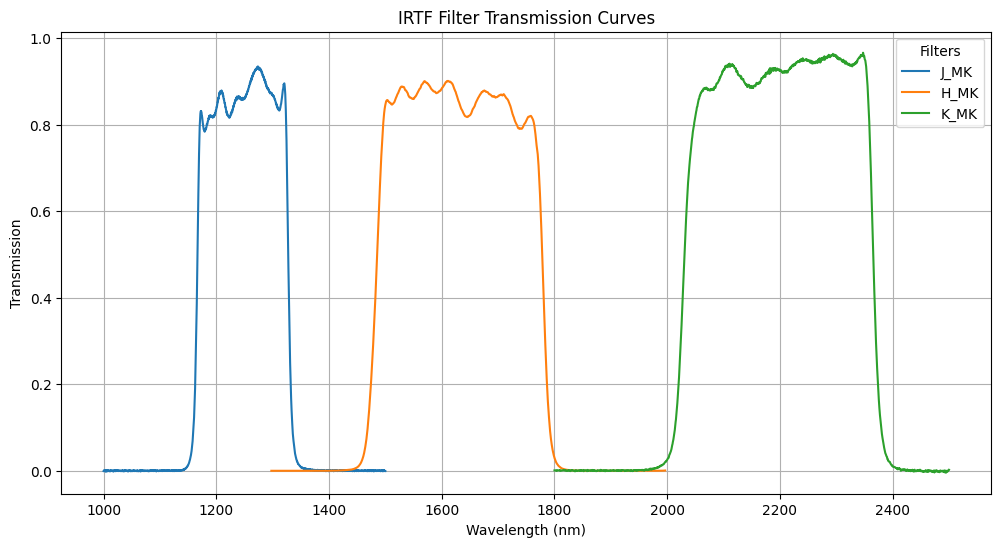

In [16]:
## IRTF

plt.figure(figsize=(12, 6))

for filter_name, file_name in irtf_filter_files.items():
    data = pd.read_csv(file_name, sep='\t', header=0)
    
    # strings to numbers
    data['WL (Micrometers)'] = pd.to_numeric(data['WL (Micrometers)'], errors='coerce')
    data['Transmission (%)'] = pd.to_numeric(data['Transmission (%)'], errors='coerce')
   
    # percentage -> fraction
    data['Transmission (%)'] = data['Transmission (%)'] / 100.0
   
    # micrometers -> nanometers
    data['WL (Micrometers)'] = data['WL (Micrometers)'] * 1000  # Micrometers to Nanometers
    wavelength = data['WL (Micrometers)'].values
    transmission = data['Transmission (%)'].values

    irtf_wavelengths[filter_name] = data['WL (Micrometers)'].values
    irtf_transmissions[filter_name] = data['Transmission (%)'].values

    plt.plot(wavelength, transmission, label=filter_name)
    

plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmission')
plt.title('IRTF Filter Transmission Curves')
plt.legend(title='Filters')
plt.grid(True)
plt.show()

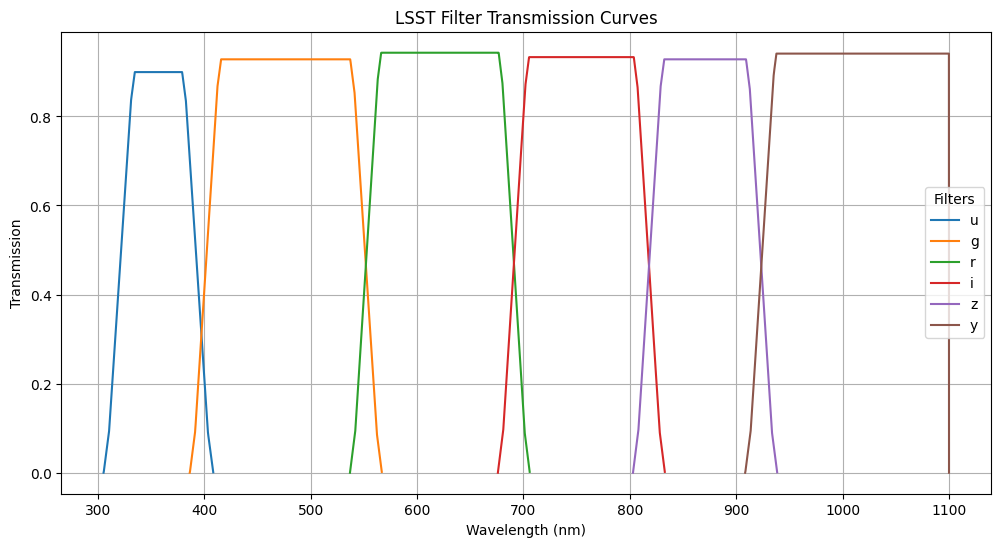

In [17]:
## LSST

plt.figure(figsize=(12, 6))

for filter_name, file_name in lsst_filter_files.items(): 
    data = pd.read_csv(file_name, delim_whitespace=True, comment='#', header=None)
    data.columns = ['Wavelength', 'Transmission']
    # angstrom -> nanometers
    data['Wavelength'] = data['Wavelength'] / 10.0  # Convert Angstroms to nanometers
    wavelength = data['Wavelength'].values
    transmission = data['Transmission'].values
    
    lsst_wavelengths[filter_name] = data['Wavelength'].values
    lsst_transmissions[filter_name] = data['Transmission'].values
    
    plt.plot(wavelength, transmission, label=filter_name)
    
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmission')
plt.title('LSST Filter Transmission Curves')
plt.legend(title='Filters')
plt.grid(True)
plt.show()

### 2.3

Finally, get the SEDs of three stars from CALSPEC:
https://www.stsci.edu/hst/instrumentation/reference-data-for-calibration-and-tools/astronomical-catalogs/calspec
and for the actual data:
https://archive.stsci.edu/hlsps/reference-atlases/cdbs/current_calspec/

(There is no M5V but there is a M3.5V star - BD-11 3759)


Finally, reconstruct a plot like this (set the wavelength ranges appropriately for the filters I've listed)
<img src="https://www.researchgate.net/profile/C-Chiosi/publication/1925441/figure/fig1/AS:339731901632519@1458009805844/The-filter-sets-used-in-the-present-work-From-top-to-bottom-we-show-the-filter-detector.png">

except replace the middle panel with the atmospheric transmission from your interpolator.

Something like this for the atmosphere plot (but until the wavelength you need): 
<img src="https://www.researchgate.net/profile/Joseph-Shaw-3/publication/260940640/figure/fig3/AS:296902361927680@1447798447054/Atmospheric-transmittance-versus-wavelength-calculated-with-Modtran5-for-a-zenith.png">

In [18]:
from astropy.io import fits

In [19]:
sed_files = {
    'Vega': 'alpha_lyr_stis_011.fits',
    'G-191 B2B': 'g191b2b_stiswfcnic_004.fits',
    'Delumi': 'delumi_stis_005.fits',
    'Etauma': 'etauma_stis_008.fits',
    'Sun': 'sun_reference_stis_002.fits',
    'BD-11 3759': 'bd11d3759_stis_003.fits'
}

sed_wavelengths = {}
sed_fluxes = {}

In [20]:
# for loop to open sed files and store data in pd df
for star_name, file_name in sed_files.items():
    with fits.open(file_name) as hdulist:
        data = hdulist[1].data 
        
        wavelength = data['WAVELENGTH']  # Angstroms
        flux = data['FLUX'] 
        # wavelength -> nanometers
        wavelength_nm = wavelength / 10.0  # Angstroms -> nanometers

        sed_wavelengths[star_name] = wavelength_nm
        sed_fluxes[star_name] = flux

In [21]:
# wavelength range
wavelength_min = 300   # nm
wavelength_max = 2500  # nm

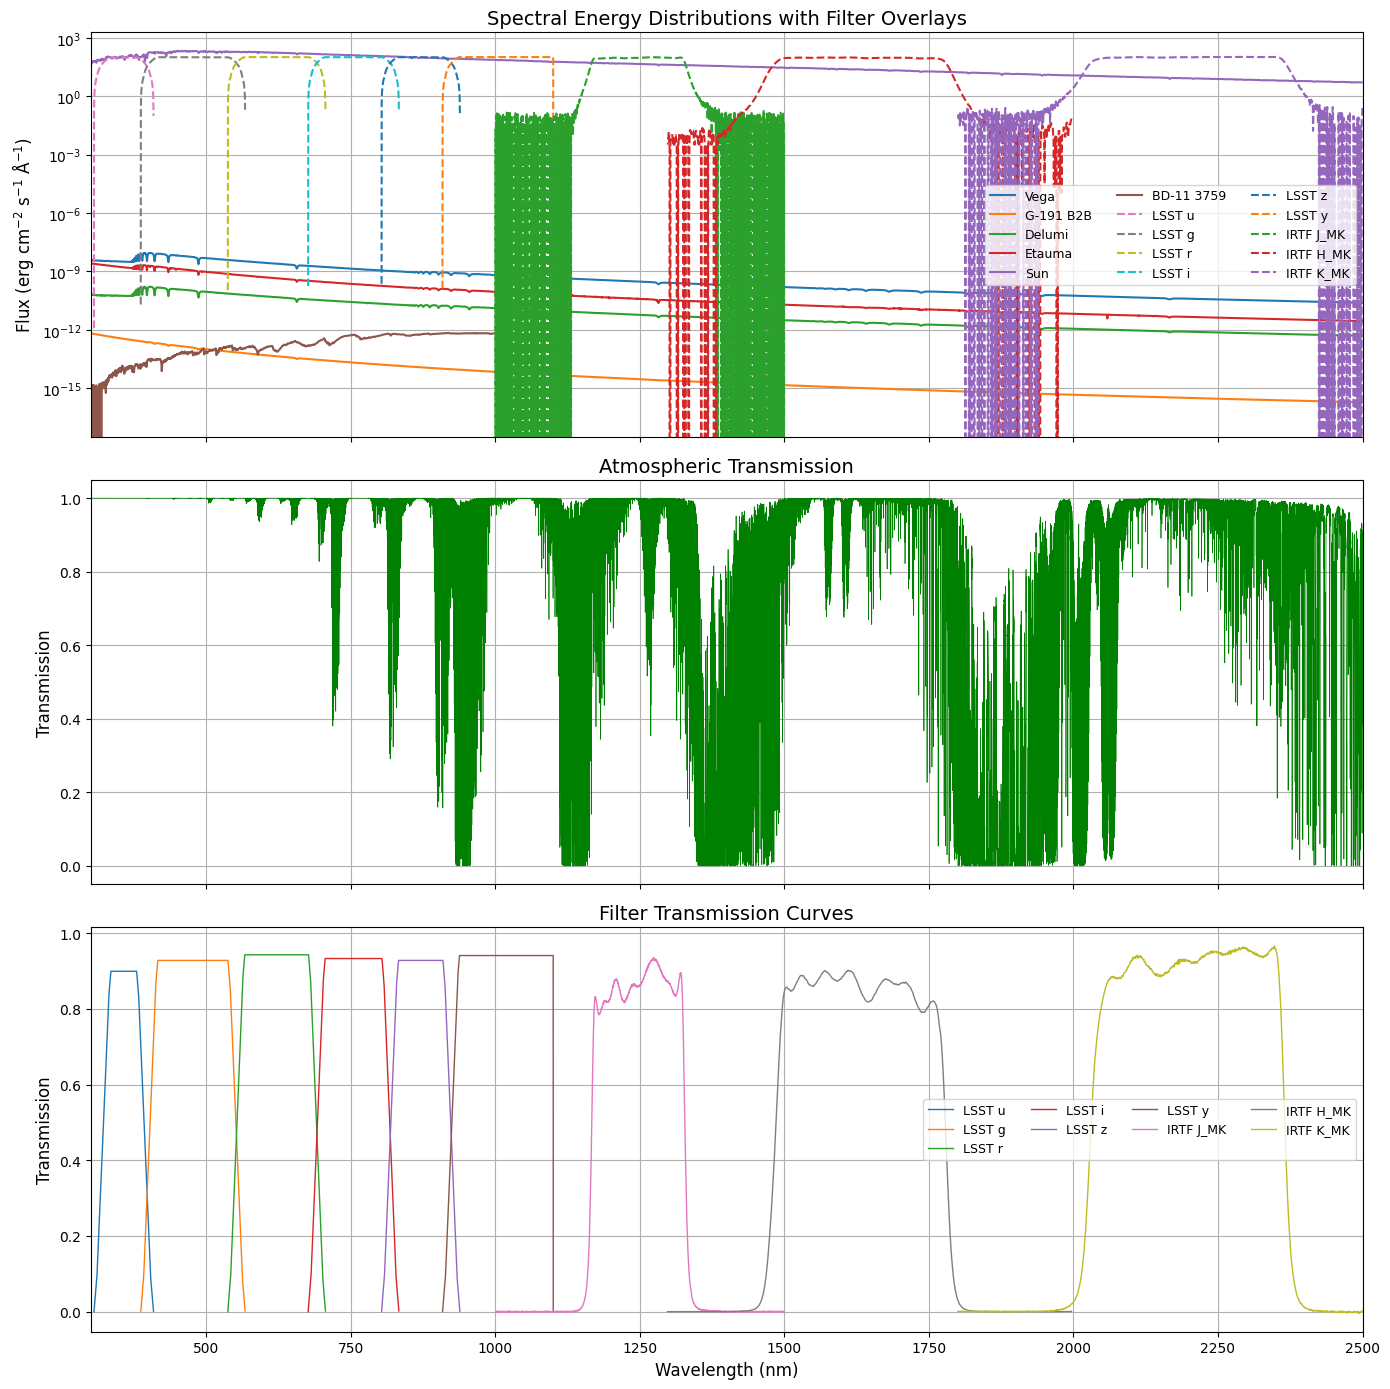

In [22]:
fig, axs = plt.subplots(3, 1, figsize=(14, 14), sharex=True)

# Top - SEDs with Filters
for star_name in sed_wavelengths.keys():
    mask = (sed_wavelengths[star_name] >= wavelength_min) & (sed_wavelengths[star_name] <= wavelength_max)
    axs[0].plot(sed_wavelengths[star_name][mask], sed_fluxes[star_name][mask], label=star_name)
    
# Overlay filters on the SED plot
# scale factor to make things more readable 
scale_factor = np.max([np.max(sed_fluxes[star]) for star in sed_fluxes.keys()]) * 0.5

for filter_name in lsst_wavelengths.keys():
    wavelength = lsst_wavelengths[filter_name]
    transmission = lsst_transmissions[filter_name]
    mask = (wavelength >= wavelength_min) & (wavelength <= wavelength_max)
    scaled_transmission = transmission[mask] * scale_factor
    axs[0].plot(wavelength[mask], scaled_transmission, label=f'LSST {filter_name}', linestyle='--')

for filter_name in irtf_wavelengths.keys():
    wavelength = irtf_wavelengths[filter_name]
    transmission = irtf_transmissions[filter_name]
    mask = (wavelength >= wavelength_min) & (wavelength <= wavelength_max)
    scaled_transmission = transmission[mask] * scale_factor
    axs[0].plot(wavelength[mask], scaled_transmission, label=f'IRTF {filter_name}', linestyle='--')

axs[0].set_yscale('log')
axs[0].set_ylabel('Flux (erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$)', fontsize=12)
axs[0].set_title('Spectral Energy Distributions with Filter Overlays', fontsize=14)
axs[0].legend(ncol=3, fontsize=9)
axs[0].grid(True)
axs[0].set_xlim(wavelength_min, wavelength_max)

# Middle - Atmospheric Transmission
atm_wavelength_nm = combined_wavelength * 1000  #  microns -> nm
atm_mask = (atm_wavelength_nm >= wavelength_min) & (atm_wavelength_nm <= wavelength_max)
axs[1].plot(atm_wavelength_nm[atm_mask], combined_transmission[atm_mask], color='green', linewidth='0.5')
axs[1].set_ylabel('Transmission', fontsize=12)
axs[1].set_title('Atmospheric Transmission', fontsize=14)
axs[1].grid(True)

# Bottom - Filter Transmission Curves
for filter_name in lsst_wavelengths.keys():
    wavelength = lsst_wavelengths[filter_name]
    transmission = lsst_transmissions[filter_name]
    mask = (wavelength >= wavelength_min) & (wavelength <= wavelength_max)
    axs[2].plot(wavelength[mask], transmission[mask], label=f'LSST {filter_name}', linewidth=1)

for filter_name in irtf_wavelengths.keys():
    wavelength = irtf_wavelengths[filter_name]
    transmission = irtf_transmissions[filter_name]
    mask = (wavelength >= wavelength_min) & (wavelength <= wavelength_max)
    axs[2].plot(wavelength[mask], transmission[mask], label=f'IRTF {filter_name}', linewidth=1)

axs[2].set_xlabel('Wavelength (nm)', fontsize=12)
axs[2].set_ylabel('Transmission', fontsize=12)
axs[2].set_title('Filter Transmission Curves', fontsize=14)
axs[2].legend(ncol=4, fontsize=9)
axs[2].grid(True)

plt.tight_layout()
plt.show()

# Q3. Combine the filter transmission and your atmosphere transmission - we'll assume the mirror and CCDs are perfect over the entire wavelength range. Implement the integrals for flux and magnitude discussed in Lecture 3 as python code. (40 pts)

- You'll have to do something to `interpolate` measurements continuously across the full wavelength range you have across Optical to NIR (you can ignore the MIR file for now, but you'll want it next week)
- Make sure the units are consistent for both wavelength and transmission before you write your interpolator or address differences in some other way 
- You'll need to make sure your interpolator can match the wavelength spacing of the SEDs in Q2
- Rememeber that the intergrals intclude the transmission $T(\lambda)$, which is not normalized properly, so make sure to normalize your integral appropriately
- Normalize the synthetic flux in two ways
    1. such as Vega has magnitude 0 in each band.
    2. such that a synthetic AB source has magnitude 0 in each band

Report the magitudes of the Sun and BD-11 3759 in the Vega and AB system, and the AB magnitudes of Vega in a table (columns = passbands, rows = star/system)

- 15 pts each for the Sun and BD-11 3759 (2 pts for the six optical bands, 1 pt each for JHK) 
- 10 pts for the AB mags of Vega (yes, I know there are 9 bands, not 10, but you can have the one extra)

In [23]:
from scipy.interpolate import interp1d

lsst_total_transmissions = {}
irtf_total_transmissions = {}

In [24]:
# Interpolate atmospheric transmission onto filter wavelength grids and multiply
for filter_name in lsst_wavelengths.keys():
    # Interpolate atmospheric transmission onto filter wavelength grid
    interp_atm_transmission = interp1d(atm_wavelength_nm, combined_transmission, kind='linear', bounds_error=False, fill_value=0)
    atm_transmission_on_filter = interp_atm_transmission(lsst_wavelengths[filter_name])

    # Combine transmissions
    total_transmission = lsst_transmissions[filter_name] * atm_transmission_on_filter
    lsst_total_transmissions[filter_name] = total_transmission

for filter_name in irtf_wavelengths.keys():
    # Interpolate atmospheric transmission onto filter wavelength grid
    interp_atm_transmission = interp1d(atm_wavelength_nm, combined_transmission, kind='linear', bounds_error=False, fill_value=0)
    atm_transmission_on_filter = interp_atm_transmission(irtf_wavelengths[filter_name])

    # Combine transmissions
    total_transmission = irtf_transmissions[filter_name] * atm_transmission_on_filter
    irtf_total_transmissions[filter_name] = total_transmission


In [25]:
# minimum and maximum wavelengths from the SEDs
#wavelength_min = max(300, np.min([np.min(wave) for wave in sed_wavelengths.values()]))
#wavelength_max = min(2500, np.max([np.max(wave) for wave in sed_wavelengths.values()]))

# wavelength grid nm
common_wavelength = np.arange(wavelength_min, wavelength_max, 1.0)  

In [26]:
# Interpolate SEDs onto the common wavelength grid
sed_fluxes_interp = {}

for star_name in sed_wavelengths.keys():
    interp_sed_flux = interp1d(sed_wavelengths[star_name], sed_fluxes[star_name], kind='linear', bounds_error=False, fill_value=0)
    sed_fluxes_interp[star_name] = interp_sed_flux(common_wavelength)

In [27]:
## LSST
# Interpolate atmospheric transmission onto LSST filter wavelength grids
for filter_name in lsst_wavelengths.keys():
    interp_atm_transmission = interp1d(
        atm_wavelength_nm,
        combined_transmission,
        kind='linear',
        bounds_error=False,
        fill_value=0
    )
    atm_transmission_on_filter = interp_atm_transmission(lsst_wavelengths[filter_name])
    total_transmission = lsst_transmissions[filter_name] * atm_transmission_on_filter
    lsst_total_transmissions[filter_name] = total_transmission

In [28]:
## IRTF
# Interpolate atmospheric transmission onto IRTF filter wavelength grids
for filter_name in irtf_wavelengths.keys():
    interp_atm_transmission = interp1d(
        atm_wavelength_nm,
        combined_transmission,
        kind='linear',
        bounds_error=False,
        fill_value=0
    )
    atm_transmission_on_filter = interp_atm_transmission(irtf_wavelengths[filter_name])
    total_transmission = irtf_transmissions[filter_name] * atm_transmission_on_filter
    irtf_total_transmissions[filter_name] = total_transmission

In [29]:
# Combine LSST and IRTF transmissions
all_filters = {**lsst_total_transmissions, **irtf_total_transmissions}
all_filter_wavelengths = {**lsst_wavelengths, **irtf_wavelengths}

# Interpolate total transmissions onto the common wavelength grid
filter_transmissions_interp = {}

for filter_name in all_filters.keys():
    wavelengths = all_filter_wavelengths[filter_name]
    transmission = all_filters[filter_name]
    
    interp_transmission = interp1d(
        wavelengths,
        transmission,
        kind='linear',
        bounds_error=False,
        fill_value=0
    )
    filter_transmissions_interp[filter_name] = interp_transmission(common_wavelength)

In [30]:
synthetic_fluxes = {}

for star_name in sed_fluxes_interp.keys():
    synthetic_fluxes[star_name] = {}
    for filter_name in filter_transmissions_interp.keys():
        # Get interpolated flux and transmission
        flux = sed_fluxes_interp[star_name]
        transmission = filter_transmissions_interp[filter_name]
        
        # Compute numerator and denominator of the integral
        numerator = np.trapz(flux * transmission, common_wavelength)
        denominator = np.trapz(transmission, common_wavelength)
        
        # Check if denominator is zero to avoid division by zero
        if denominator == 0:
            synthetic_fluxes[star_name][filter_name] = np.nan
            continue
        
        # Normalize the flux
        F_synthetic = numerator / denominator
        synthetic_fluxes[star_name][filter_name] = F_synthetic


In [31]:
# Constants
c = 2.99792458e18  # Speed of light in Å/s
Fnu_0 = 3631e-23   # 3631 Jy in erg/cm^2/s/Hz

# Compute F_lambda for AB zero point
F_lambda_AB = (Fnu_0 * c) / (common_wavelength * 10)**2  # Wavelength in Ångstroms

# Initialize a dictionary to store AB zero points
AB_zero_points = {}

for filter_name in filter_transmissions_interp.keys():
    transmission = filter_transmissions_interp[filter_name]
    
    numerator = np.trapz(F_lambda_AB * transmission, common_wavelength)
    denominator = np.trapz(transmission, common_wavelength)
    
    if denominator == 0:
        AB_zero_points[filter_name] = np.nan
        continue
    
    F_synthetic_AB = numerator / denominator
    AB_zero_points[filter_name] = F_synthetic_AB


In [32]:
# Initialize dictionaries to store magnitudes
magnitudes_Vega = {}
magnitudes_AB = {}

for star_name in synthetic_fluxes.keys():
    magnitudes_Vega[star_name] = {}
    magnitudes_AB[star_name] = {}
    for filter_name in synthetic_fluxes[star_name].keys():
        F_star = synthetic_fluxes[star_name][filter_name]
        F_Vega = synthetic_fluxes['Vega'][filter_name]
        F_AB = AB_zero_points[filter_name]
        
        # Skip if any value is NaN
        if np.isnan(F_star) or np.isnan(F_Vega) or np.isnan(F_AB):
            magnitudes_Vega[star_name][filter_name] = np.nan
            magnitudes_AB[star_name][filter_name] = np.nan
            continue
        
        # Vega Magnitude
        m_Vega = -2.5 * np.log10(F_star / F_Vega)
        magnitudes_Vega[star_name][filter_name] = m_Vega
        
        # AB Magnitude
        m_AB = -2.5 * np.log10(F_star / F_AB)
        magnitudes_AB[star_name][filter_name] = m_AB


/tmp/ipykernel_4072364/3737179955.py:20: RuntimeWarning: invalid value encountered in log10
  m_Vega = -2.5 * np.log10(F_star / F_Vega)
/tmp/ipykernel_4072364/3737179955.py:24: RuntimeWarning: invalid value encountered in log10
  m_AB = -2.5 * np.log10(F_star / F_AB)
/tmp/ipykernel_4072364/3737179955.py:20: RuntimeWarning: divide by zero encountered in log10
  m_Vega = -2.5 * np.log10(F_star / F_Vega)
/tmp/ipykernel_4072364/3737179955.py:24: RuntimeWarning: divide by zero encountered in log10
  m_AB = -2.5 * np.log10(F_star / F_AB)


In [33]:
filters_optical = ['u', 'g', 'r', 'i', 'z', 'y']
filters_nir = ['J_MK', 'H_MK', 'K_MK']
filters_all = filters_optical + filters_nir

In [34]:
stars = ['Sun', 'BD-11 3759']

In [35]:
print("Vega Magnitudes:")
header = "{:<15}".format('Star') + "".join(["{:<10}".format(filt) for filt in filters_all])
print(header)
for star_name in stars:
    mags = []
    for filt in filters_all:
        mag = magnitudes_Vega.get(star_name, {}).get(filt, np.nan)
        mag_str = f"{mag:.2f}" if not np.isnan(mag) else "--"
        mags.append(mag_str)
    row = "{:<15}".format(star_name) + "".join(["{:<10}".format(m) for m in mags])
    print(row)


Vega Magnitudes:
Star           u         g         r         i         z         y         J_MK      H_MK      K_MK      
Sun            -26.02    -26.34    -27.07    -27.41    -27.57    -27.66    -27.94    -28.25    -28.30    
BD-11 3759     14.08     12.25     10.59     8.84      7.96      8.08      --        inf       inf       


In [36]:
print("\nAB Magnitudes:")
header = "{:<15}".format('Star') + "".join(["{:<10}".format(filt) for filt in filters_all])
print(header)
for star_name in ['Vega'] + stars:
    mags = []
    for filt in filters_all:
        mag = magnitudes_AB.get(star_name, {}).get(filt, np.nan)
        mag_str = f"{mag:.2f}" if not np.isnan(mag) else "--"
        mags.append(mag_str)
    row = "{:<15}".format(star_name) + "".join(["{:<10}".format(m) for m in mags])
    print(row)



AB Magnitudes:
Star           u         g         r         i         z         y         J_MK      H_MK      K_MK      
Vega           0.84      -0.11     0.14      0.37      0.51      0.61      0.93      1.36      1.89      
Sun            -25.18    -26.45    -26.93    -27.04    -27.06    -27.05    -27.01    -26.88    -26.41    
BD-11 3759     14.92     12.14     10.73     9.21      8.47      8.69      --        inf       inf       


In [38]:
## trouble shooting
for star_name in ['Sun', 'BD-11 3759']:
    for star_name in sed_wavelengths:
        print(f"\n{star_name} SED:")
        print(f"Wavelength range: {sed_wavelengths[star_name].min()} nm to {sed_wavelengths[star_name].max()} nm")
        print(f"Flux range: {sed_fluxes[star_name].min()} to {sed_fluxes[star_name].max()}")



Vega SED:
Wavelength range: 90.0452 nm to 299365.1702754215 nm
Flux range: 0.0 to 8.877099944015754e-09

G-191 B2B SED:
Wavelength range: 114.00999755859375 nm to 31998.514269796346 nm
Flux range: 8.432684676736171e-21 to 1.987934816760628e-11

Delumi SED:
Wavelength range: 166.86846923828125 nm to 31897.799223584985 nm
Flux range: 2.2656028645935424e-17 to 1.6104000077898917e-10

Etauma SED:
Wavelength range: 114.85999755859375 nm to 31899.905800885557 nm
Flux range: 1.2112927164272138e-16 to 1.9519557525882192e-08

Sun SED:
Wavelength range: 119.5 nm to 2695.735107421875 nm
Flux range: 0.0019545000977814198 to 214.89999389648438

BD-11 3759 SED:
Wavelength range: 291.4097412109375 nm to 1023.4962890999999 nm
Flux range: -4.651099841504252e-15 to 6.799199874993334e-13

Vega SED:
Wavelength range: 90.0452 nm to 299365.1702754215 nm
Flux range: 0.0 to 8.877099944015754e-09

G-191 B2B SED:
Wavelength range: 114.00999755859375 nm to 31998.514269796346 nm
Flux range: 8.432684676736171e-21

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
import os
from scipy.interpolate import interp1d

# Constants
c = 2.99792458e18  # Speed of light in Å/s
Fnu_0 = 3631e-23   # 3631 Jy in erg/cm^2/s/Hz

sed_files = {
    'Vega': 'alpha_lyr_stis_011.fits',
    'Sun': 'sun_reference_stis_002.fits',
    'BD-11 3759': 'bd11d3759_stis_003.fits'
}

sed_wavelengths = {}
sed_fluxes = {}

for star_name, file_name in sed_files.items():
    with fits.open(file_name) as hdulist:
        data = hdulist[1].data 
        wavelength = data['WAVELENGTH']  # Wavelength in Angstroms
        flux = data['FLUX']  # Flux in erg/cm^2/s/Å
        wavelength_nm = wavelength / 10.0  # Convert Angstroms to nanometers
        sed_wavelengths[star_name] = wavelength_nm
        sed_fluxes[star_name] = flux

In [88]:
# wavelength range
wavelength_min = max(300, np.min([np.min(wave) for wave in sed_wavelengths.values()]))
wavelength_max = min(2500, np.max([np.max(wave) for wave in sed_wavelengths.values()]))

# common wavelength grid nm
common_wavelength = np.arange(wavelength_min, wavelength_max, 1.0) 
sed_fluxes_interp = {}

In [89]:
for star_name in sed_wavelengths.keys():
    try:
        wavelengths = sed_wavelengths[star_name]
        fluxes = sed_fluxes[star_name]
        
        # Remove NaN, Inf, and negative fluxes
        valid_indices = np.isfinite(wavelengths) & np.isfinite(fluxes)
        wavelengths = wavelengths[valid_indices]
        fluxes = fluxes[valid_indices]
        fluxes[fluxes < 0] = 0  # Set negative fluxes to zero
        
        # Sort and remove duplicates
        sorted_indices = np.argsort(wavelengths)
        wavelengths_sorted = wavelengths[sorted_indices]
        fluxes_sorted = fluxes[sorted_indices]
        unique_wavelengths, unique_indices = np.unique(wavelengths_sorted, return_index=True)
        fluxes_unique = fluxes_sorted[unique_indices]
        
        # Create the interpolation function
        interp_sed_flux = interp1d(
            unique_wavelengths,
            fluxes_unique,
            kind='linear',
            bounds_error=False,
            fill_value=0
        )
        sed_fluxes_interp[star_name] = interp_sed_flux(common_wavelength)
    except Exception as e:
        print(f"Error interpolating flux for {star_name}: {e}")


In [90]:
# Initialize dictionaries to store the combined transmissions
lsst_total_transmissions = {}
irtf_total_transmissions = {}

# Interpolate atmospheric transmission onto filter wavelength grids and multiply
for filter_name in lsst_wavelengths.keys():
    interp_atm_transmission = interp1d(
        atm_wavelength_nm,
        combined_transmission,
        kind='linear',
        bounds_error=False,
        fill_value=0
    )
    atm_transmission_on_filter = interp_atm_transmission(lsst_wavelengths[filter_name])
    total_transmission = lsst_transmissions[filter_name] * atm_transmission_on_filter
    lsst_total_transmissions[filter_name] = total_transmission

for filter_name in irtf_wavelengths.keys():
    interp_atm_transmission = interp1d(
        atm_wavelength_nm,
        combined_transmission,
        kind='linear',
        bounds_error=False,
        fill_value=0
    )
    atm_transmission_on_filter = interp_atm_transmission(irtf_wavelengths[filter_name])
    total_transmission = irtf_transmissions[filter_name] * atm_transmission_on_filter
    irtf_total_transmissions[filter_name] = total_transmission

In [91]:
# Combine LSST and IRTF transmissions
all_filters = {**lsst_total_transmissions, **irtf_total_transmissions}
all_filter_wavelengths = {**lsst_wavelengths, **irtf_wavelengths}

# Interpolate total transmissions
filter_transmissions_interp = {}

In [92]:
for filter_name in all_filters.keys():
    wavelengths = all_filter_wavelengths[filter_name]
    transmission = all_filters[filter_name]
    
    interp_transmission = interp1d(
        wavelengths,
        transmission,
        kind='linear',
        bounds_error=False,
        fill_value=0
    )
    filter_transmissions_interp[filter_name] = interp_transmission(common_wavelength)

In [93]:
synthetic_fluxes = {}

for star_name in sed_fluxes_interp.keys():
    synthetic_fluxes[star_name] = {}
    for filter_name in filter_transmissions_interp.keys():
        # Get interpolated flux and transmission
        flux = sed_fluxes_interp[star_name]
        transmission = filter_transmissions_interp[filter_name]
        
        # Compute numerator and denominator of the integral
        numerator = np.trapz(flux * transmission, common_wavelength)
        denominator = np.trapz(transmission, common_wavelength)
        
        # Check if denominator is zero to avoid division by zero
        if denominator == 0 or np.isnan(denominator):
            synthetic_fluxes[star_name][filter_name] = np.nan
            continue
        
        # Normalize the flux
        F_synthetic = numerator / denominator
        synthetic_fluxes[star_name][filter_name] = F_synthetic

In [94]:
# Compute F_lambda for AB zero point
F_lambda_AB = (Fnu_0 * c) / (common_wavelength * 10)**2  # Wavelength in Ångstroms

AB_zero_points = {}

In [95]:
for filter_name in filter_transmissions_interp.keys():
    transmission = filter_transmissions_interp[filter_name]
    
    numerator = np.trapz(F_lambda_AB * transmission, common_wavelength)
    denominator = np.trapz(transmission, common_wavelength)
    
    if denominator == 0 or np.isnan(denominator):
        AB_zero_points[filter_name] = np.nan
        continue
    
    F_synthetic_AB = numerator / denominator
    AB_zero_points[filter_name] = F_synthetic_AB

In [ ]:
magnitudes_Vega = {}
magnitudes_AB = {}

In [96]:
for star_name in synthetic_fluxes.keys():
    magnitudes_Vega[star_name] = {}
    magnitudes_AB[star_name] = {}
    for filter_name in synthetic_fluxes[star_name].keys():
        F_star = synthetic_fluxes[star_name][filter_name]
        F_Vega = synthetic_fluxes['Vega'][filter_name]
        F_AB = AB_zero_points[filter_name]
        
        # Skip if any value is NaN
        if np.isnan(F_star) or np.isnan(F_Vega) or np.isnan(F_AB):
            magnitudes_Vega[star_name][filter_name] = np.nan
            magnitudes_AB[star_name][filter_name] = np.nan
            continue
        
        # Vega Magnitude
        m_Vega = -2.5 * np.log10(F_star / F_Vega)
        magnitudes_Vega[star_name][filter_name] = m_Vega
        
        # AB Magnitude
        m_AB = -2.5 * np.log10(F_star / F_AB)
        magnitudes_AB[star_name][filter_name] = m_AB

/tmp/ipykernel_3261466/1152721146.py:16: RuntimeWarning: divide by zero encountered in log10
  m_Vega = -2.5 * np.log10(F_star / F_Vega)
/tmp/ipykernel_3261466/1152721146.py:20: RuntimeWarning: divide by zero encountered in log10
  m_AB = -2.5 * np.log10(F_star / F_AB)


In [97]:
# List of filters
filters_optical = ['u', 'g', 'r', 'i', 'z', 'y']
filters_nir = ['J_MK', 'H_MK', 'K_MK']
filters_all = filters_optical + filters_nir

In [98]:
stars = ['Sun', 'BD-11 3759']

In [99]:
# Vega Magnitudes
print("Vega Magnitudes:")
header = "{:<15}".format('Star') + "".join(["{:<10}".format(filt) for filt in filters_all])
print(header)
for star_name in stars:
    mags = []
    for filt in filters_all:
        mag = magnitudes_Vega.get(star_name, {}).get(filt, np.nan)
        mag_str = f"{mag:.2f}" if not np.isnan(mag) else "--"
        mags.append(mag_str)
    row = "{:<15}".format(star_name) + "".join(["{:<10}".format(m) for m in mags])
    print(row)

Vega Magnitudes:
Star           u         g         r         i         z         y         J_MK      H_MK      K_MK      
Sun            --        --        --        --        --        --        -27.94    -28.25    -28.30    
BD-11 3759     --        --        --        --        --        --        17.89     inf       inf       


In [100]:
# AB Magnitudes
print("\nAB Magnitudes:")
header = "{:<15}".format('Star') + "".join(["{:<10}".format(filt) for filt in filters_all])
print(header)
for star_name in ['Vega'] + stars:
    mags = []
    for filt in filters_all:
        mag = magnitudes_AB.get(star_name, {}).get(filt, np.nan)
        mag_str = f"{mag:.2f}" if not np.isnan(mag) else "--"
        mags.append(mag_str)
    row = "{:<15}".format(star_name) + "".join(["{:<10}".format(m) for m in mags])
    print(row)


AB Magnitudes:
Star           u         g         r         i         z         y         J_MK      H_MK      K_MK      
Vega           --        --        --        --        --        --        0.93      1.36      1.89      
Sun            --        --        --        --        --        --        -27.01    -26.88    -26.41    
BD-11 3759     --        --        --        --        --        --        18.82     inf       inf       


In [101]:
for star_name in sed_wavelengths.keys():
    print(f"{star_name} wavelength range: {sed_wavelengths[star_name].min()} nm to {sed_wavelengths[star_name].max()} nm")


Vega wavelength range: 90.0452 nm to 299365.1702754215 nm
Sun wavelength range: 119.5 nm to 2695.735107421875 nm
BD-11 3759 wavelength range: 291.4097412109375 nm to 1023.4962890999999 nm


In [102]:
for filter_name, wavelengths in all_filter_wavelengths.items():
    print(f"{filter_name} filter wavelength range: {wavelengths.min()} nm to {wavelengths.max()} nm")


u filter wavelength range: 3054 nm to 4085 nm
g filter wavelength range: 3864 nm to 5669 nm
r filter wavelength range: 5370 nm to 7059 nm
i filter wavelength range: 6760 nm to 8329 nm
z filter wavelength range: 8030 nm to 9385 nm
y filter wavelength range: 9084 nm to 11000 nm
J_MK filter wavelength range: 1000.0 nm to 1500.0 nm
H_MK filter wavelength range: 1297.7 nm to 1996.3999999999999 nm
K_MK filter wavelength range: 1800.0 nm to 2500.0 nm


### Divide and conquer, so you encounter issues in parallel and can explain things to each other, rather than working in series. 

# Due Sep 17 at Noon!